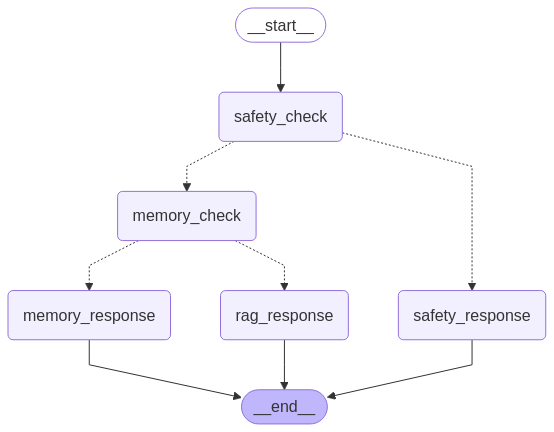

In [1]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, END, START
from l_graph import (
    ChatState, 
    safety_guardrail_node, 
    memory_check_node, 
    memory_response_node, 
    rag_response_node,
    safety_response_node, 
    safety_router,
    memory_router
)

# Build the graph - matching your current architecture in l_graph.py
graph_builder = StateGraph(ChatState)
    
# Add nodes
graph_builder.add_node("safety_check", safety_guardrail_node)
graph_builder.add_node("memory_check", memory_check_node)
graph_builder.add_node("memory_response", memory_response_node)
graph_builder.add_node("rag_response", rag_response_node)
graph_builder.add_node("safety_response", safety_response_node)

# Set the entry point
graph_builder.add_edge(START, "safety_check")

# Add conditional edges based on safety check
graph_builder.add_conditional_edges(
    "safety_check",
    safety_router,
    {
        "memory_check": "memory_check",
        "safety_response": "safety_response"
    }
)

# Add conditional edges based on memory check
graph_builder.add_conditional_edges(
    "memory_check",
    memory_router,
    {
        "memory_response": "memory_response",
        "rag_response": "rag_response"
    }
)

# Set terminal nodes
graph_builder.add_edge("memory_response", END)
graph_builder.add_edge("rag_response", END)
graph_builder.add_edge("safety_response", END)

# Compile the graph
graph = graph_builder.compile()

# Generate and display the visualization
display(Image(graph.get_graph().draw_mermaid_png()))

